## Step 1: PROBLEM STATEMENT AND BUSINESS CASE

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

The 10 classes are as follows:  
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 

## Step 2: IMPORTING DATA

In [2]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import random

In [3]:
# dataframes creation for both training and testing datasets 
fashion_train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

## Step 3: Vizualising the Data

In [4]:
# Let's view the head of the training dataset
# 784 indicates 28x28 pixels and 1 coloumn for the label
# After you check the tail, 60,000 training dataset are present
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Let's view the last elements in the training dataset
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_train_df.shape

(60000, 785)

In [7]:
# Create training and testing arrays
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

In [8]:
training.shape

(60000, 785)

In [9]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

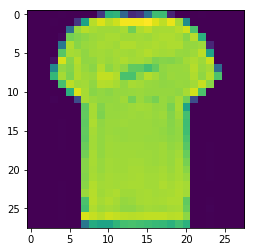

In [11]:
#Seeing any particular image
plt.imshow(training[10, 1:].reshape(28, 28)) #10th item, all columns and reshape into 28 by 28 picture

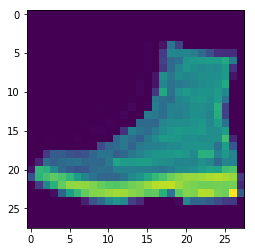

In [13]:
# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow(training[i,1:].reshape((28,28))) # reshape and plot the image

7.0

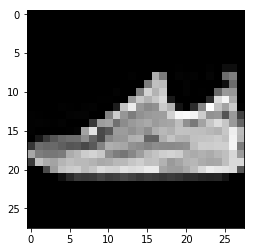

In [22]:
#Printing in Greyscale with label included
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow(training[i,1:].reshape((28,28)), cmap = 'gray') # reshape and plot the image
label = training[i,0] #The category given in the dataset
label

In [23]:
# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

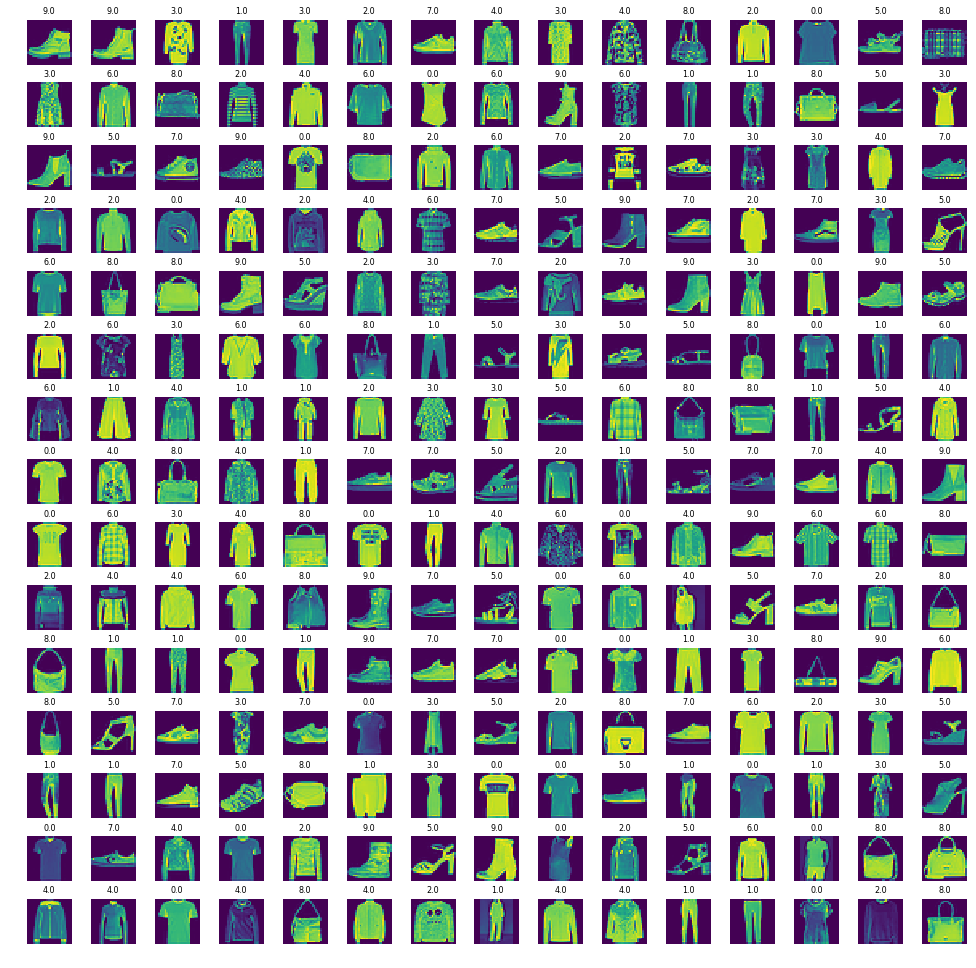

In [24]:
#################### Not necessary ###########################
# Let's view more images in a grid format - This is just for visualization purpose
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

## Step 4 - Training the Model

In [25]:
# Prepare the training and testing dataset 
X_train = training[:,1:]/255 #Divided by 255 for Normalization process
y_train = training[:,0]

X_test = testing[:,1:]/255 #Divided by 255 for Normalization process
y_test = testing[:,0]

In [26]:
#Seperating into Training and Validate Sets - Validation Set to avoid overfitting
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [27]:
X_train.shape

(48000, 784)

In [28]:
y_train.shape

(48000,)

In [29]:
X_validate.shape

(12000, 784)

In [30]:
y_validate.shape

(12000,)

In [31]:
# Reshaping the data in order to make the images - similar to the visualization above
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [20]:
#Looking at the shapes again
X_train.shape

(48000, 28, 28, 1)

In [21]:
X_test.shape

(10000, 28, 28, 1)

In [22]:
X_validate.shape

(12000, 28, 28, 1)

### Applying the AI

In [32]:
# Import train_test_split from scikit library
# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [33]:
cnn_model = Sequential()

# Try 32 fliters first then 64
cnn_model.add(Conv2D(64, 3, 3, input_shape = (28,28,1), activation='relu'))

#Adding the Pooling layer
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

#To try to improve the accuracy
cnn_model.add(Dropout(0.25))

# cnn_model.add(Conv2D(32,3, 3, activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

#Flatting the model - adding a flattening layer
cnn_model.add(Flatten())

#Adding the hidden layer
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))

#Adding the output layer - 10 output because of the 10 classifications of the items
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\Sarad\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  after removing the cwd from sys.path.
C:\Users\Sarad\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
C:\Users\Sarad\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`


In [34]:
#Compiling the Model - loss = sparse_categorical because of the different categories
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics =['accuracy'])

In [35]:
#Finally finding the accuracy
epochs = 50

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512, #Could be any number
                        nb_epoch = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

C:\Users\Sarad\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 108s 2ms/step - loss: 0.8427 - acc: 0.7086 - val_loss: 0.4986 - val_acc: 0.8228
Epoch 2/50
48000/48000 [==============================] - 85s 2ms/step - loss: 0.4572 - acc: 0.8389 - val_loss: 0.4258 - val_acc: 0.8490
Epoch 3/50
48000/48000 [==============================] - 69s 1ms/step - loss: 0.3997 - acc: 0.8605 - val_loss: 0.3790 - val_acc: 0.8684
Epoch 4/50
48000/48000 [==============================] - 60s 1ms/step - loss: 0.3687 - acc: 0.8716 - val_loss: 0.3597 - val_acc: 0.8759
Epoch 5/50
48000/48000 [==============================] - 56s 1ms/step - loss: 0.3478 - acc: 0.8770 - val_loss: 0.3319 - val_acc: 0.8853
Epoch 6/50
48000/48000 [==============================] - 59s 1ms/step - loss: 0.3268 - acc: 0.8857 - val_loss: 0.3156 - val_acc: 0.8911
Epoch 7/50
48000/48000 [==============================] - 54s 1ms/step - loss: 

## Step 5: Evaluating the Model

In [38]:
#Predicting the Loss and the accuracy
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1])) #Predicting the Accuracy
print('Test Loss : {:.3f}'.format(evaluation[0])) #Predicting the Loss

10000/10000 [==============================] - 8s 753us/step
Test Accuracy : 0.918
Test Accuracy : 0.255


In [40]:
# get the predictions for the test data from the Labels of the clothes
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

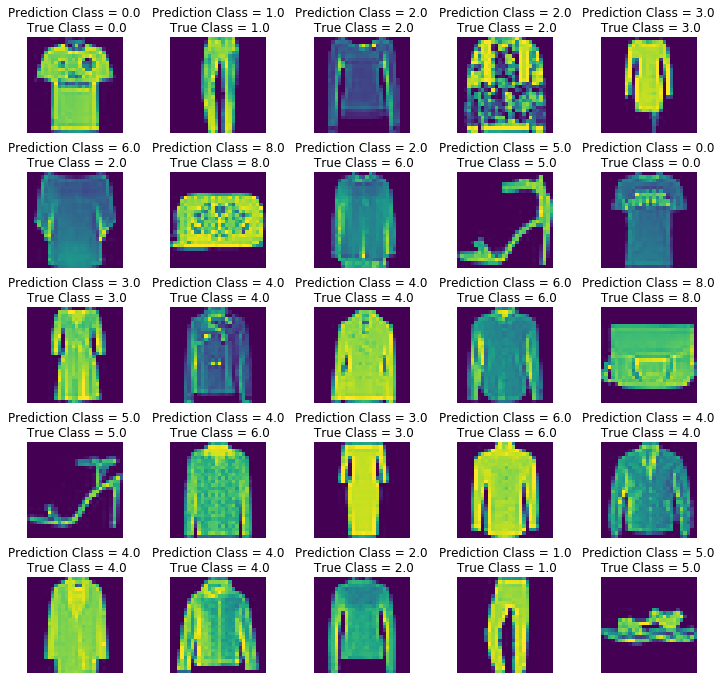

In [41]:
#Visualizing the predictions
L = 5 #(25 * 25 grid)
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() #Flatten the axes

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

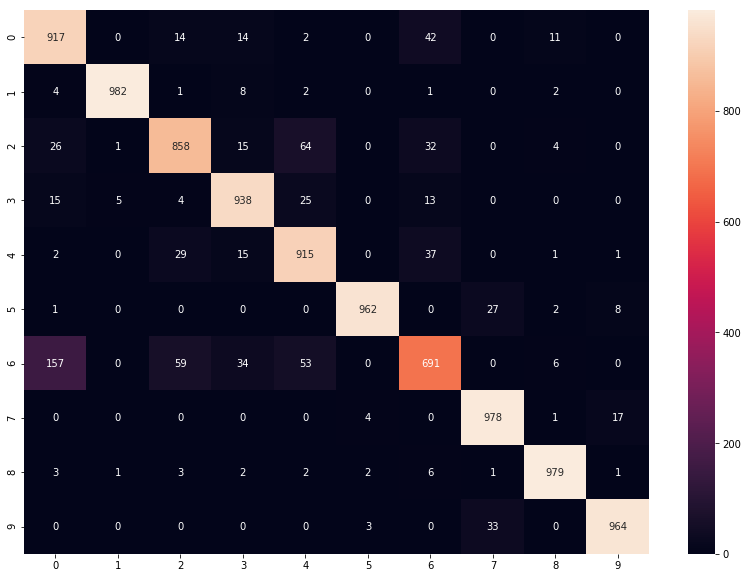

In [43]:
#Creating the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True, fmt='g')
# Sum the diagonal element to get the total true correct values

In [44]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.82      0.92      0.86      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.89      0.86      0.87      1000
     Class 3       0.91      0.94      0.93      1000
     Class 4       0.86      0.92      0.89      1000
     Class 5       0.99      0.96      0.98      1000
     Class 6       0.84      0.69      0.76      1000
     Class 7       0.94      0.98      0.96      1000
     Class 8       0.97      0.98      0.98      1000
     Class 9       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [46]:
# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

# Websites to Further Practice Above Model

In [47]:
# DeepFashion Dataset
# VUE.AI